In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="darkgrid")
%matplotlib inline
titanic = sns.load_dataset("titanic")

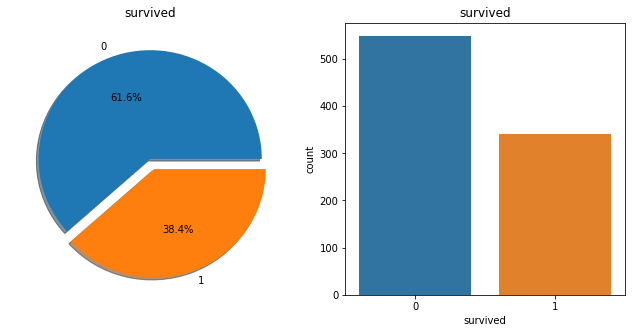

In [9]:
f,ax=plt.subplots(1,2,figsize=(11,5))
titanic['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('survived',data=titanic,ax=ax[1])
ax[1].set_title('survived')
plt.show()

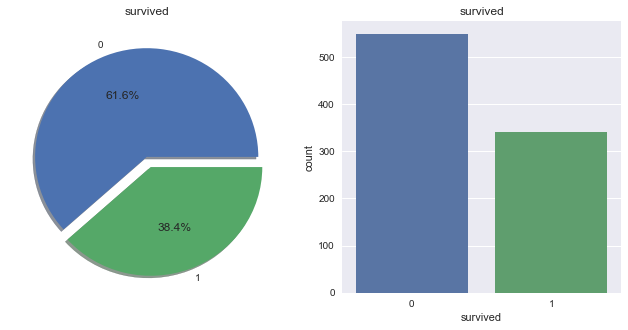

In [11]:
f,ax=plt.subplots(1,2,figsize=(11,5))
titanic['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('survived',data=titanic,ax=ax[1])
ax[1].set_title('survived')
plt.show()

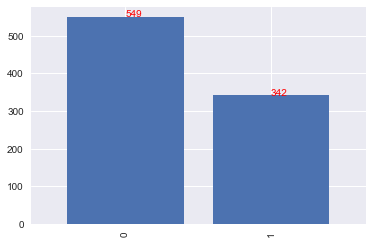

In [17]:
s = titanic['survived'].value_counts().head(10)
ax=s.plot.bar(width=.8) 

for i, v in s.reset_index().iterrows():
    ax.text(i, v.survived + 0.2 , v.survived, color='red')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic[['sex','class','who','adult_male']]=titanic[['sex','class','who','adult_male']].apply(LabelEncoder().fit_transform)

In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,2,1,1,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,0,2,0,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,2,2,0,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,0,2,0,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,2,1,1,NaN,Southampton,no,True


In [7]:
import pandas as pd
import numpy as np

In [2]:
test_df = pd.read_csv("../input/test.csv")

In [4]:
#Handle datetime，将Feb-1985转换成1985-02-01
test_df['earliest_cr_line'] =  pd.to_datetime(test_df['earliest_cr_line'], format='%b-%Y')
test_df['issue_d'] = pd.to_datetime(test_df['issue_d'], format='%b-%Y')

In [11]:
test_df[['earliest_cr_line','issue_d','today']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177476 entries, 0 to 177475
Data columns (total 3 columns):
earliest_cr_line    177471 non-null datetime64[ns]
issue_d             177476 non-null datetime64[ns]
today               177476 non-null object
dtypes: datetime64[ns](2), object(1)
memory usage: 4.1+ MB


In [8]:
test_df['today']='2018-05-01'

In [31]:
np.datetime64('2005-02-25')

numpy.datetime64('2005-02-25')

In [27]:
# test_df.earliest_cr_line.map(lambda x: x.strftime('%Y-%m'))
test_df.earliest_cr_line.apply(lambda x:x.date().strftime('%Y-%m'))

AttributeError: 'Series' object has no attribute 'date'

In [22]:
test_df['nb_months'] = (test_df.earliest_cr_line - np.datetime64('2018-05'))/ np.timedelta64(1, 'M')

In [23]:
test_df[['earliest_cr_line','issue_d','nb_months']].head()

,earliest_cr_line,issue_d,nb_months
0,1995-10-01,2014-08-01,308.967330
1,2005-11-01,2015-11-01,430.004723
2,2001-08-01,2015-12-01,378.981088
3,1989-11-01,2012-06-01,238.000780
4,1997-08-01,2015-11-01,330.980102
